# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

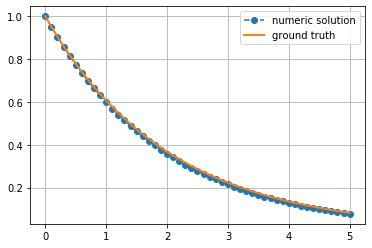

In [4]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

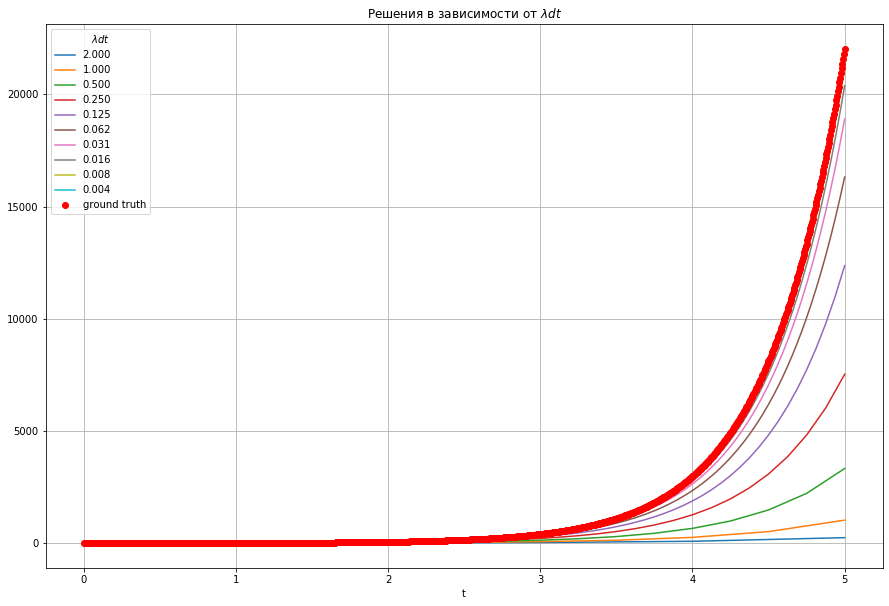

In [5]:
lam = 2

fig, ax = plt.subplots(figsize = (15, 10))

for i in range (10):
    dt = 2**(-i)
    tt, y = euler_solve(lam, u0=1.0, T=5, dt = 2**(-i))
    ax.plot(tt, y, label = format(lam*dt, ".3f"))

x = np.linspace(0, 5, 1000)
ax.plot(x, np.exp(lam*x), 'ro', lw=2, label='ground truth')

ax.legend(loc='upper left', title = '$\lambda dt$')
ax.set_title('Решения в зависимости от $\lambda dt$')
ax.set_xlabel('t')
ax.grid(b = True)

Видно, что чем больше $\lambda dt > 1$, тем дальше решение от идеала.

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [6]:
def IM_euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an implicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - lam * dt)
    return tt, y




Пусть в уравнении $\lambda < 0$. Тогда можно нетрудно прийти к выводу, что для нормальной работы Implicit Euler scheme необходимо $\frac{1}{|1 - \lambda dt|} < 1$, а для Explicit Euler scheme - $|1 + \lambda dt| < 1$. При этом возможно поборать такие $\lambda, dt$, что одно условие выполняется, а второе - нет (иллюстрация ниже). При этом для $\lambda > 0$ такие условия подобрать нельзя. Для обоих методов опасно $\lambda dt \approx 1$.

Text(0.5, 0, '$t$')

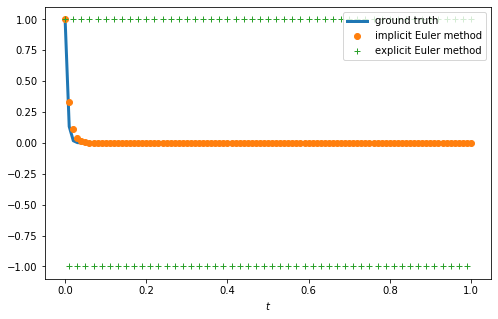

In [7]:
#краш explicit EM: lam = -200, dt = 0.01 => |1 + lam * dt| = 1, 1 / |1 - lam * dt| = 1/3

lam = -200
dt = 0.01
T = 1
u0 = 1

x_im, y_im = IM_euler_solve(lam, u0, T, dt)
x_ex, y_ex = euler_solve(lam, u0, T, dt)
x = np.linspace(0, 1, 100)
u = np.exp(lam * x)

fig2, ax2 = plt.subplots(figsize = (8, 5))
ax2.plot(x, u, lw = 3, label = 'ground truth')
ax2.plot(x_im, y_im, 'o', label = 'implicit Euler method')
ax2.plot(x_ex, y_ex, '+', label = 'explicit Euler method')
ax2.legend(loc = 'best')
ax2.set_xlabel('$t$')

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [8]:
def gen_euler_solve(A, u0, T, dt):
    """Функция возвращает массив, n-ный элемент которого - вектор от tt[n]"""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = []
    y.append(u0)
    for k in range(num_steps):
        y.append(y[k] + dt * A @ y[k])
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [9]:
A = np.array([[-10, 10], [32, -499]])
u0 = np.array([[1], [0]])
dt = 0.01

tt_ex, y_ex = gen_euler_solve(A = A, u0 = u0, T = 1, dt = dt)
lam1, lam2 = np.linalg.eigvals(A)
print('1 / lam1 = ', 1 / lam1, '. 1 / lam2 = ', 1 / lam2)

#незачем приводить систему к диагональному виду, ведь после того, как мы её приведем к диагональному виду, на диагонали
#окажутся собственные числа, а мы их уже знаем
s = lam2 / lam1
print('stifness = ', s)

1 / lam1 =  -0.10699218914940684 . 1 / lam2 =  -0.0020013868677237067
stifness =  53.45902427704808


Method isn't stable as $dt = 0.01 > 0.002 > \frac{1}{|\lambda_2|}$. System is stiff as s >> 1.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

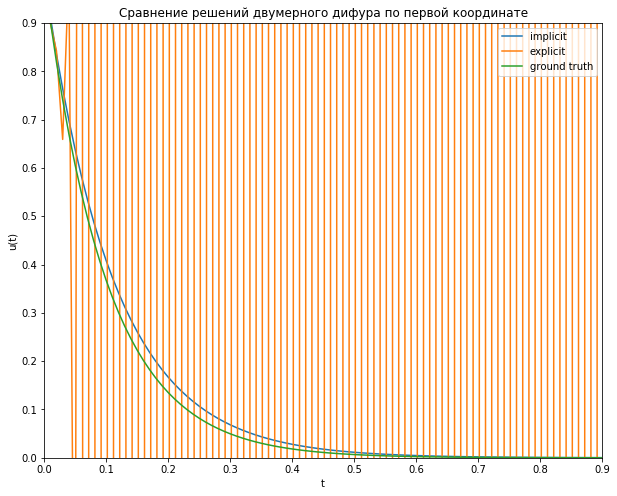

In [10]:
def gen_IM_euler_solve(A, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an implicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = []
    y.append(u0)
    for k in range(num_steps):
        M = np.eye(2) - dt * A
        v = y[k]
        x = np.linalg.solve(M, v)
        y.append(x)
    return tt, y

tt_im, y_im = gen_IM_euler_solve(A = A, u0 = u0, T = 1, dt = dt)

u = [np.exp(i * A) @ u0 for i in tt_im]

y_im0 = []
y_im1 = []
y_ex0 = []
y_ex1 = []
u_0 = []
u_1 = []

for i in range(len(tt_im)):
    y_im0.append(y_im[i][0][0])
    y_im1.append(y_im[i][1][0])
    y_ex0.append(y_ex[i][0][0])
    y_ex1.append(y_ex[i][1][0])
    u_0.append(u[i][0][0])
    u_1.append(u[i][1][0])
    

fig4, ax4 = plt.subplots(figsize = (10, 8))
ax4.set_title(label = 'Сравнение решений двумерного дифура по первой координате')
ax4.set_xlabel('t')
ax4.set_ylabel('u(t)')
ax4.set_xlim(xmin = 0, xmax = 0.9)
ax4.set_ylim(ymin = 0, ymax = 0.9)
ax4.plot(tt_im, y_im0, label ='implicit')
ax4.plot(tt_im, y_ex0, label ='explicit')
ax4.plot(tt_im, u_0, label ='ground truth')

ax4.legend(loc = 'upper right')



IMPLICIT ЛУЧШЕ

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

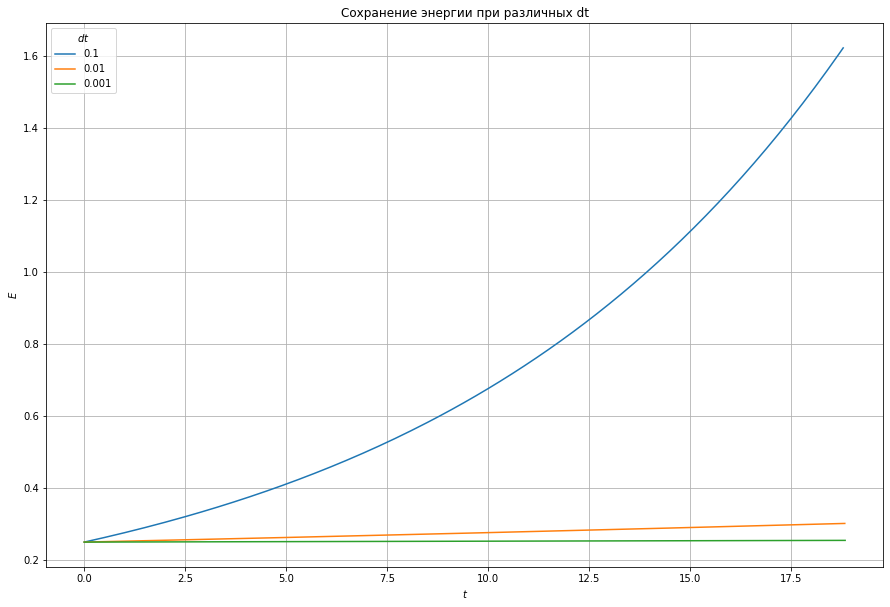

In [22]:
#собираем матрицу гармонического осциллятора и для простоты полагаем omega = 1
omega = 1
A = np.array([[0, -omega**2], [1, 0]])
u0 = np.array([[0.5],[0.5]])

t1, u1 = gen_euler_solve(A, u0, T = 6*np.pi, dt = 0.1)
t2, u2 = gen_euler_solve(A, u0, T = 6*np.pi, dt = 0.01)
t3, u3 = gen_euler_solve(A, u0, T = 6*np.pi, dt = 0.001)

E1 = [0.5 * (i[0][0]**2 + (omega*i[1][0])**2) for i in u1]
E2 = [0.5 * (i[0][0]**2 + (omega*i[1][0])**2) for i in u2]
E3 = [0.5 * (i[0][0]**2 + (omega*i[1][0])**2) for i in u3]

fig3, ax3 = plt.subplots(figsize=(15, 10))
ax3.set_title('Сохранение энергии при различных dt')
ax3.set_xlabel('$t$')
ax3.set_ylabel('$E$')
ax3.plot(t1, E1, label = '0.1')
ax3.plot(t2, E2, label = '0.01')
ax3.plot(t3, E3, label = '0.001')
ax3.legend(loc = 'upper left', title = '$dt$')
ax3.grid(b = True)


### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

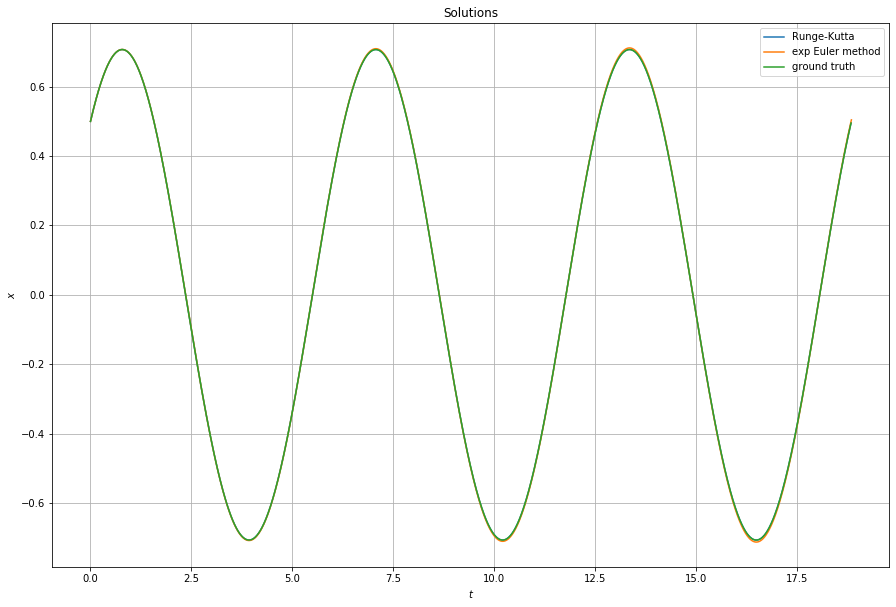

In [50]:
def RK (A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = []
    y.append(u0)
    for k in range(num_steps):
        f = y[k] + 0.5 * dt * A @ y[k]
        y.append(y[k] + dt * A @ f)
    return tt, y

t, u_rk = RK(A, u0, T = 6 * np.pi, dt = 0.01)

u_rk_x = []
u3_x =[]
E_rk = []

for i in range(len(t)):
    u_rk_x.append(u_rk[i][1][0])
    E_rk.append((u_rk[i][1][0])**2 + (u_rk[i][0][0])**2)
    
for i in range(len(t3)):
    u3_x.append(u3[i][1][0])


fig6, ax6 = plt.subplots(figsize = (15, 10))
ax6.plot(t, u_rk_x, label = 'Runge-Kutta')
ax6.plot(t3, u3_x, label = 'exp Euler method')
ax6.plot(t, 1 / np.sqrt(2) * np.cos(t - np.pi / 4), label = 'ground truth')
ax6.set_title('Solutions')
ax6.set_xlabel('$t$')
ax6.set_ylabel('$x$')
ax6.grid(b = True)
ax6.legend(loc = 'best')



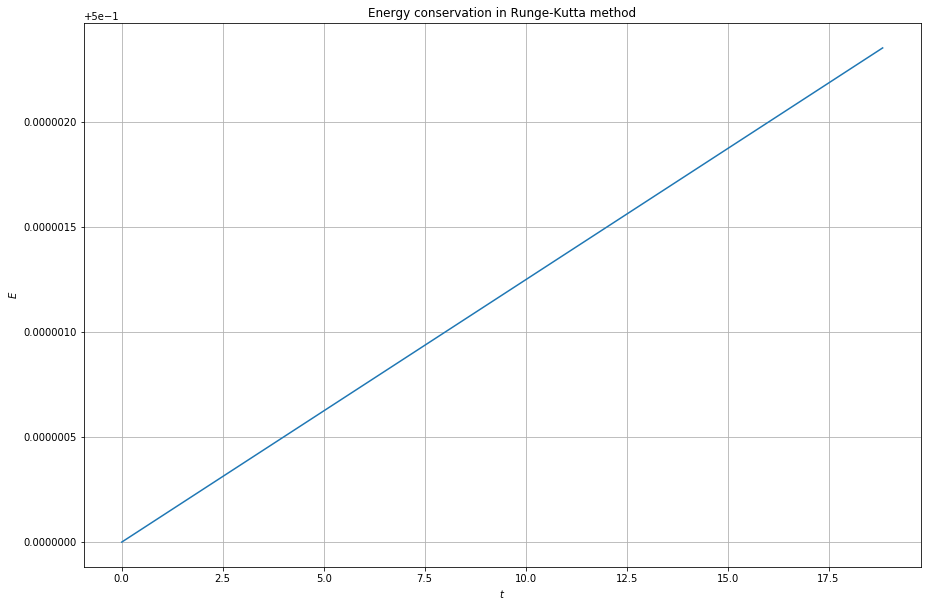

In [51]:
fig7, ax7 = plt.subplots(figsize = (15, 10))
ax7.plot(t, E_rk)
ax7.set_title('Energy conservation in Runge-Kutta method')
ax7.set_xlabel('$t$')
ax7.set_ylabel('$E$')
ax7.grid(b = True)


Метод Рунге-Кутты и просто метод Эйлера дают почти одинаковые результаты, но энергия в методе Рунге-Кутты не сохраняется.